# CPSC5207EL2: Intelligent Mobile Robotics

This Python code utilizes the numpy and skfuzzy libraries to implement a fuzzy logic system for controlling robot speed based on input speed values. It defines fuzzy membership functions for categorizing speeds into 'slow', 'medium', and 'fast', applies fuzzy logic rules based on an input speed, aggregates the outcomes of these rules, and then calculates a crisp (defuzzified) robot speed output. Finally, it visualizes both the membership functions and the result of the fuzzy logic process.

1. Setting Up the Environment:

- Defines the universe of discourse (x_speed) for speed, ranging from 0 to 100.
- Creates membership functions for categorizing speeds into 'slow', 'medium', and 'fast', using trapezoidal (fuzz.trapmf) and triangular (fuzz.trimf) shapes.

2. Visualization of Membership Functions:

- Plots these membership functions to visually represent how speeds are categorized into 'slow', 'medium', and 'fast'.

3. Fuzzification of Input Speed:

- Takes an example input speed (75) and calculates its degree of membership in each speed category using the fuzz.interp_membership function. This step converts the crisp input speed into fuzzy values.

4. Application of Fuzzy Logic Rules:

- Based on the fuzzified input, it applies predefined logic to decide on actions ('throttle up', 'maintain speed', 'throttle down') aimed at adjusting the robot's speed towards 'medium'. This is done using the np.fmin function to model the interaction between the input's membership degree and the desired action.

5. Aggregation of Rule Outputs:

- Combines the outcomes of the fuzzy logic rules into a single aggregated fuzzy set using the np.fmax function. This aggregation represents the overall action to be taken based on the input speed.

6. Defuzzification:

- Converts the aggregated fuzzy set into a crisp output value representing the robot's adjusted speed using the fuzz.defuzz method with the 'centroid' technique. This step calculates the center of gravity of the aggregated fuzzy set to determine a specific speed value.

7. Visualization of Defuzzification Result:

- Plots the original membership functions and the result of the fuzzy logic process, including the defuzzified robot speed, to visualize the system's decision-making process.

8. Printing the Results:

- Outputs the input speed and the calculated robot speed (adjusted towards 'medium') to the console.



In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=f7301df4d9fd2a7bd2797752d594496ce651228311290bab4e5c483f7aed127b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Input Speed: 45
Robot Speed (Adjusted to 'medium'): 60.0


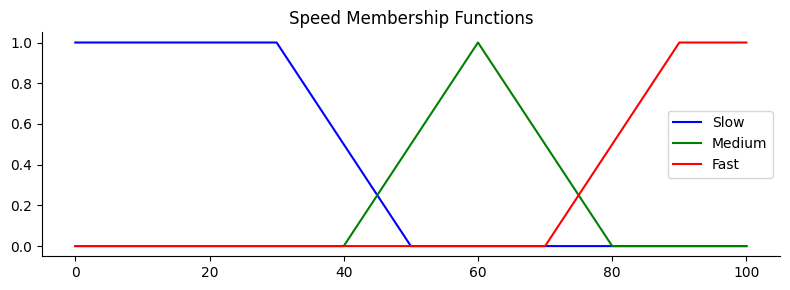

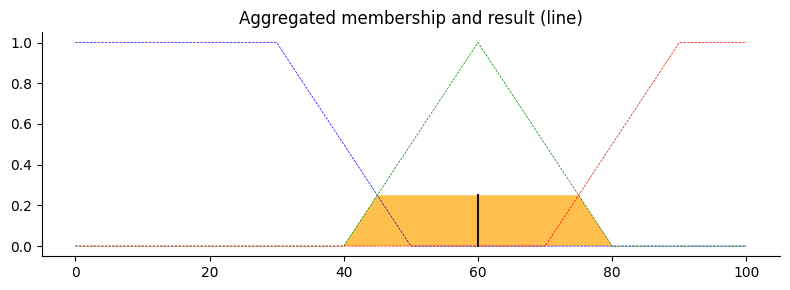

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Speed universe variables
x_speed = np.arange(0, 101, 1)

# Membership functions for slow, medium, and fast
slow = fuzz.trapmf(x_speed, [0, 0, 30, 50])
medium = fuzz.trimf(x_speed, [40, 60, 80])
fast = fuzz.trapmf(x_speed, [70, 90, 100, 100])

# Visualize these universes and membership functions
fig, ax = plt.subplots(nrows=1, figsize=(8, 3))

ax.plot(x_speed, slow, 'b', linewidth=1.5, label='Slow')
ax.plot(x_speed, medium, 'g', linewidth=1.5, label='Medium')
ax.plot(x_speed, fast, 'r', linewidth=1.5, label='Fast')
ax.set_title('Speed Membership Functions')
ax.legend()

# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Example input speed
input_speed = 45

# Fuzzification
speed_level_slow = fuzz.interp_membership(x_speed, slow, input_speed)
speed_level_medium = fuzz.interp_membership(x_speed, medium, input_speed)
speed_level_fast = fuzz.interp_membership(x_speed, fast, input_speed)

# Define fuzzy rules and apply them
# Throttle up action for 'slow' input to increase speed towards 'medium'
throttle_up_from_slow = np.fmin(speed_level_slow, medium)

# Maintain action for 'medium' input to keep speed as is
maintain_speed_at_medium = np.fmin(speed_level_medium, medium)

# Throttle down action for 'fast' input to decrease speed towards 'medium'
throttle_down_from_fast = np.fmin(speed_level_fast, medium)

# Aggregate the outputs for all three actions
aggregated_actions = np.fmax(throttle_up_from_slow, np.fmax(maintain_speed_at_medium, throttle_down_from_fast))

# Calculate defuzzified result for the aggregated action
robot_speed = fuzz.defuzz(x_speed, aggregated_actions, 'centroid')
speed_activation = fuzz.interp_membership(x_speed, aggregated_actions, robot_speed)

print(f"Input Speed: {input_speed}")
print(f"Robot Speed (Adjusted to 'medium'): {robot_speed}")

# Visualize defuzzification
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_speed, slow, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_speed, medium, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_speed, fast, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, np.zeros_like(x_speed), aggregated_actions, facecolor='Orange', alpha=0.7)
ax0.plot([robot_speed, robot_speed], [0, speed_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
